# Austin Smart City Waste Disposal and Waste Management System Analysis

Gilbert Agus Trianto

## Description

### Objective
Analysis of the Waste Disposal and Management System in Austin Smart City City in 2021 uses the collection of selected data and drawing conclusions based on sample data, as well as planning for the conditioning of the Waste Disposal and Management System in the future.

### Problem Statement
Based on the conditions for the disposal and management of waste in the city of Austin City, analysis is needed to determine the conditions that occur in each site of waste disposal and plan for the calculation or plan for the disposal and management of waste in the city of Austin City.

## Working Area

The dataset used is taken from Google Cloud 'Bigdataquery' / SQL Bigquery with the topic of Austin_Waste
The data taken, processed using the query as follows:

SELECT report_date,load_time, load_type, load_weight, dropoff_site FROM `bigquery-public-data.austin_waste.waste_and_diversion` WHERE EXTRACT(YEAR FROM report_date) = 2021

In [8]:
# Import Library used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import t

Explore data and display the form of data obtained

In [9]:
austin_waste = pd.read_csv('austinCity_dataset.csv', parse_dates=['report_date','load_time'])
# Convert the data types in the 'report_date' and 'load_time' columns to become data type DATETIME types

In [10]:
austin_waste.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00+00:00,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00+00:00,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00+00:00,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00+00:00,SWEEPING,NaN,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00+00:00,TIRES,1640.0,MRF


In [11]:
austin_waste.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-07-09,2021-07-09 09:48:00+00:00,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00+00:00,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00+00:00,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00+00:00,LITTER,1900.0,TDS LANDFILL
26156,2021-07-09,2021-07-09 12:00:00+00:00,LITTER,3040.0,TDS LANDFILL


In [12]:
austin_waste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   report_date   26157 non-null  datetime64[ns]     
 1   load_time     26157 non-null  datetime64[ns, UTC]
 2   load_type     26157 non-null  object             
 3   load_weight   25109 non-null  float64            
 4   dropoff_site  26157 non-null  object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), object(2)
memory usage: 1021.9+ KB


## Statistic Problem

1. Before doing statistical calculations and analysis, clean the data first.Make sure there is no missing value, etc.

Check data on duplicate data

In [13]:
# Check duplicate data
austin_waste.duplicated().sum()

445

See the condition of duplicate data to find out what actions should be taken

In [14]:
austin_waste[austin_waste.duplicated()]

,report_date,load_time,load_type,load_weight,dropoff_site
1,2021-01-01,2021-01-01 12:00:00+00:00,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00+00:00,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00+00:00,SWEEPING,NaN,ONION CREEK
9,2021-01-02,2021-01-02 12:00:00+00:00,SWEEPING,NaN,ONION CREEK
10,2021-01-02,2021-01-02 12:00:00+00:00,SWEEPING,NaN,ONION CREEK
...,...,...,...,...,...
26132,2021-07-09,2021-07-09 12:00:00+00:00,SWEEPING,NaN,ONION CREEK
26133,2021-07-09,2021-07-09 12:00:00+00:00,SWEEPING,NaN,ONION CREEK
26134,2021-07-09,2021-07-09 12:00:00+00:00,SWEEPING,NaN,ONION CREEK
26135,2021-07-09,2021-07-09 12:00:00+00:00,SWEEPING,NaN,ONION CREEK


Because duplicate data conditions are felt to be the same as a whole, a merger of duplicate data is carried out into one

In [15]:
austin_waste.drop_duplicates(inplace=True)

In [16]:
# Check duplicate data
austin_waste.duplicated().sum()

0

In [17]:
# Showing null value in dataset
austin_waste[austin_waste.isnull().any(axis=1)].sample(5)

,report_date,load_time,load_type,load_weight,dropoff_site
18615,2021-05-13,2021-05-13 01:30:00+00:00,SWEEPING,NaN,ONION CREEK
18267,2021-05-11,2021-05-11 10:40:00+00:00,SWEEPING,NaN,PARK CENTER
24832,2021-06-28,2021-06-28 10:10:00+00:00,SWEEPING,NaN,ON ROUTE HIGH DUMP
20706,2021-05-28,2021-05-28 01:00:00+00:00,SWEEPING,NaN,ONION CREEK
24279,2021-06-24,2021-06-24 12:10:00+00:00,SWEEPING,NaN,ONION CREEK


Check data on missing value data

In [18]:
# Cek null data
austin_waste.isnull().sum()

report_date       0
load_time         0
load_type         0
load_weight     629
dropoff_site      0
dtype: int64

After obtaining a missing value data, a middle/median search from the load_weight column to deal with missing value.
The median value is used so that the dataset remains balanced as a whole.

In [19]:
austin_waste['load_weight'] = austin_waste['load_weight'].fillna(austin_waste['load_weight'].median())

In [20]:
#Cek null data
austin_waste.isnull().sum()

report_date     0
load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

2. Next, explore simple data to find out and recognize the data you have. We can do the following things to explore your data:

### Conduct data exploration

See the time span of the dataset used

In [21]:
rentang_waktu = austin_waste['report_date'].max() - austin_waste['report_date'].min()
print(rentang_waktu)

189 days 00:00:00


The time available at the dataset for 189 days.

See how many types of trash loads and see the amount in each type of site

In [22]:
austin_waste['load_type'].value_counts()

GARBAGE COLLECTIONS          8236
RECYCLING - SINGLE STREAM    6754
ORGANICS                     5754
BULK                         1594
BRUSH                        1513
SWEEPING                      971
MIXED LITTER                  328
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

See how many landfills and see the amount in each place

In [23]:
austin_waste['dropoff_site'].value_counts()

TDS LANDFILL             10687
ORGANICS BY GOSH          5746
BALCONES RECYCLING        3832
TDS - MRF                 2947
HORNSBY BEND              1651
ONION CREEK                396
MRF                        168
ON ROUTE HIGH DUMP          81
PARK CENTER                 74
GREAT NORTHERN              69
AUSTIN IRON AND METAL       50
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
WILCAB                       1
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD                    1
ST. EDWARDS                  1
Name: dropoff_site, dtype: int64

Displays visualization of the 5 largest sites

<Axes: ylabel='dropoff_site'>

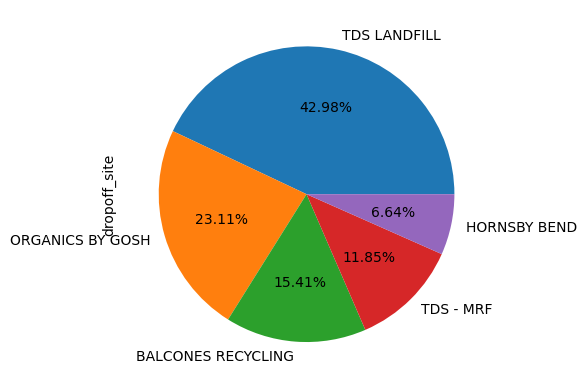

In [24]:
austin_waste['dropoff_site'].value_counts().head().plot(kind='pie', autopct='%.2f%%')

Based on the visualization of TDS Landfill is the largest site based on the 5 largest sites in the city of Austin City by dominating 42.98% of waste more than 4 other largest sites.

3. Based on Central Tendency (mean, median, and mode) for each site, insight/what information can you convey to the city government?

In [25]:
# Looking for average value based on drop off site
austinMean = austin_waste.groupby('dropoff_site').mean(numeric_only = True).round(2)
austinMean.sort_values('load_weight', ascending=False)

,load_weight
dropoff_site,
WESTFIELD,16020.00
TDS LANDFILL,15167.43
PARK BEND,13385.00
GREAT NORTHERN,11982.90
ORGANICS BY GOSH,11822.86
ON ROUTE HIGH DUMP,11405.93
ST. EDWARDS,11300.00
PARK CENTER,11300.00
WILCAB,11300.00


In [26]:
# Looking for middle value based on drop off site
austinMedian = austin_waste.groupby('dropoff_site').median(numeric_only = True)
austinMedian.sort_values('load_weight',ascending=False)

,load_weight
dropoff_site,
WESTFIELD,16020.0
TDS LANDFILL,14920.0
PARK BEND,12330.0
ORGANICS BY GOSH,11910.0
ONION CREEK,11300.0
ST. EDWARDS,11300.0
PARK CENTER,11300.0
WILCAB,11300.0
ON ROUTE HIGH DUMP,11300.0


In [27]:
# Looking for the value that most often appears based on drop off site
austin_waste_mode = austin_waste.groupby('dropoff_site').agg(lambda x: x.value_counts().index[0])
austin_waste_mode['load_weight'].sort_values(ascending=False)

dropoff_site
PARK BEND                20400.0
WESTFIELD                16020.0
BALCONES RECYCLING       11880.0
ORGANICS BY GOSH         11300.0
ONION CREEK              11300.0
ST. EDWARDS              11300.0
PARK CENTER              11300.0
WILCAB                   11300.0
ON ROUTE HIGH DUMP       11300.0
GREAT NORTHERN           11300.0
TDS - MRF                10360.0
BALCONES WOODS            8460.0
HORNSBY BEND              5500.0
AUSTIN WOOD RECYCLING     2340.0
MRF                        960.0
STEINER LANDFILL           780.0
AUSTIN IRON AND METAL      260.0
TDS LANDFILL                60.0
Name: load_weight, dtype: float64

In [28]:
# Looking for the number of appearances for the site and the weight of waste on Westfield
TDS = austin_waste[austin_waste["dropoff_site"] == 'WESTFIELD']
TDS['load_weight'].value_counts()

16020.0    1
Name: load_weight, dtype: int64

In [29]:
# Find the total appearance of the site and weight of waste on TDS Landfill
TDS = austin_waste[austin_waste["dropoff_site"] == 'TDS LANDFILL']
TDS['load_weight'].value_counts()

60.0       21
20.0       21
12020.0    21
21780.0    18
11340.0    17
           ..
30760.0     1
34080.0     1
31300.0     1
33560.0     1
11550.0     1
Name: load_weight, Length: 1606, dtype: int64

Based on the average value (mean), the middle value (median), and the most frequent value (mode) found that:
- Westfield is the biggest site of the average disposal and reservoir of waste during 2021 with an average value of 16020 kg/year, and the value of the weighted waste weighs 16020 kg.But after being checked, it turns out that garbage disposal in Westfield has only been done once.
- Based on the intensity of the disposal and reservoir of 'TDS Landfill' garbage becomes the most activity.
Waste that is discarded/accommodated in TDS Landfill on average per day of 15167.43 kg during 2021. (based on mean)
Garbage weight per day in TDS Landfill is usually discarded with a weight range of 14920 kg. (Based on median)
And for the weight of the waste that is most often dumped in TDS Landfill weighing 60kg with the appearance of 21 times in 2021. (based on Mode)

4. Choose the site that attracts the most attention of you, and give the reasons.

In [30]:
austin_waste['dropoff_site'].value_counts()

TDS LANDFILL             10687
ORGANICS BY GOSH          5746
BALCONES RECYCLING        3832
TDS - MRF                 2947
HORNSBY BEND              1651
ONION CREEK                396
MRF                        168
ON ROUTE HIGH DUMP          81
PARK CENTER                 74
GREAT NORTHERN              69
AUSTIN IRON AND METAL       50
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
WILCAB                       1
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD                    1
ST. EDWARDS                  1
Name: dropoff_site, dtype: int64

In [71]:
austin_waste['dropoff_site'].value_counts().head(6).mean()

4209.833333333333

[Text(0, 0, '10687'),
 Text(0, 0, '5746'),
 Text(0, 0, '3832'),
 Text(0, 0, '2947'),
 Text(0, 0, '1651'),
 Text(0, 0, '396')]

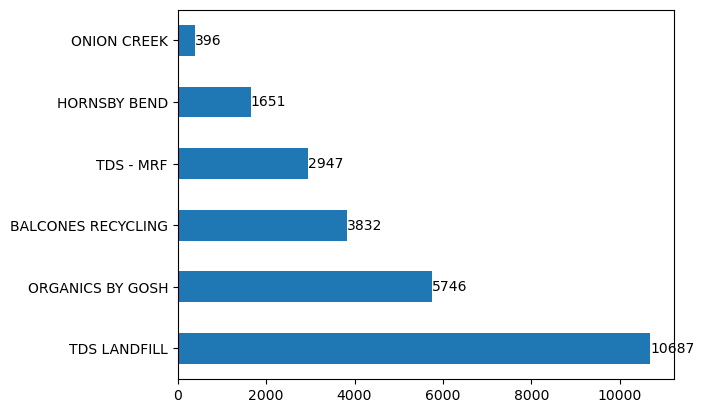

In [70]:
ax = austin_waste['dropoff_site'].value_counts().head(6).plot(kind='barh')
ax.bar_label(ax.containers[0], fmt='%.0f')

Based on the average value of the top 6 sites and visualization above, the Balcones Recycling site is selected for further analysis.

In [31]:
austin_waste[austin_waste['dropoff_site'] == 'BALCONES RECYCLING']

,report_date,load_time,load_type,load_weight,dropoff_site
111,2021-01-02,2021-01-02 12:22:00+00:00,RECYCLING - SINGLE STREAM,8760.0,BALCONES RECYCLING
112,2021-01-02,2021-01-02 12:45:00+00:00,RECYCLING - SINGLE STREAM,8500.0,BALCONES RECYCLING
113,2021-01-02,2021-01-02 11:55:00+00:00,RECYCLING - SINGLE STREAM,5020.0,BALCONES RECYCLING
114,2021-01-02,2021-01-02 11:48:00+00:00,RECYCLING - SINGLE STREAM,4440.0,BALCONES RECYCLING
115,2021-01-02,2021-01-02 09:58:00+00:00,RECYCLING - SINGLE STREAM,8660.0,BALCONES RECYCLING
...,...,...,...,...,...
26002,2021-07-07,2021-07-07 02:00:00+00:00,RECYCLING - SINGLE STREAM,4540.0,BALCONES RECYCLING
26003,2021-07-07,2021-07-07 10:00:00+00:00,RECYCLING - SINGLE STREAM,8660.0,BALCONES RECYCLING
26004,2021-07-07,2021-07-07 12:00:00+00:00,RECYCLING - SINGLE STREAM,4740.0,BALCONES RECYCLING
26005,2021-07-07,2021-07-07 09:00:00+00:00,RECYCLING - SINGLE STREAM,9200.0,BALCONES RECYCLING


Balcones recycling was chosen because it has a number of data that is not too much or not too little and is felt to be able to be used as a further research sample.

5. Use the site that you choose to check whether the load_weight data is outlier or not.Use the right technique according to the distribution of the data!.If so, what percentage of the outlier?and compare the central tendency data that has been released outliers with those that have not (the result of calculation number 3).

In [32]:
balconesSite =  austin_waste[austin_waste['dropoff_site'] == 'BALCONES RECYCLING']

In [33]:
balconesSite

,report_date,load_time,load_type,load_weight,dropoff_site
111,2021-01-02,2021-01-02 12:22:00+00:00,RECYCLING - SINGLE STREAM,8760.0,BALCONES RECYCLING
112,2021-01-02,2021-01-02 12:45:00+00:00,RECYCLING - SINGLE STREAM,8500.0,BALCONES RECYCLING
113,2021-01-02,2021-01-02 11:55:00+00:00,RECYCLING - SINGLE STREAM,5020.0,BALCONES RECYCLING
114,2021-01-02,2021-01-02 11:48:00+00:00,RECYCLING - SINGLE STREAM,4440.0,BALCONES RECYCLING
115,2021-01-02,2021-01-02 09:58:00+00:00,RECYCLING - SINGLE STREAM,8660.0,BALCONES RECYCLING
...,...,...,...,...,...
26002,2021-07-07,2021-07-07 02:00:00+00:00,RECYCLING - SINGLE STREAM,4540.0,BALCONES RECYCLING
26003,2021-07-07,2021-07-07 10:00:00+00:00,RECYCLING - SINGLE STREAM,8660.0,BALCONES RECYCLING
26004,2021-07-07,2021-07-07 12:00:00+00:00,RECYCLING - SINGLE STREAM,4740.0,BALCONES RECYCLING
26005,2021-07-07,2021-07-07 09:00:00+00:00,RECYCLING - SINGLE STREAM,9200.0,BALCONES RECYCLING


Create a function to test and search for outline values and find out the skewness in the sample data that

In [34]:
def plot_dist(balconesSite, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(balconesSite[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(balconesSite[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(balconesSite[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=balconesSite[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(balconesSite[col].name + ' Kurtosis: ' + str(balconesSite[col].kurt()))
    print(balconesSite[col].name + ' Skewness: ' + str(balconesSite[col].skew()))
    if -0.5 <= balconesSite[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif balconesSite[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif balconesSite[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

In [35]:
df_col = balconesSite.columns.tolist()
df_col

['report_date', 'load_time', 'load_type', 'load_weight', 'dropoff_site']

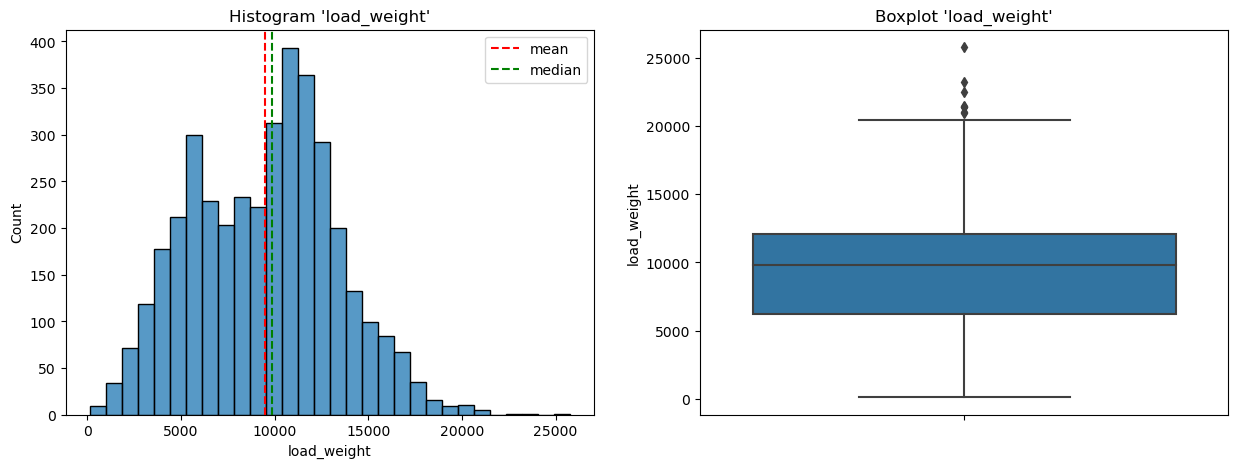

load_weight Kurtosis: -0.40373874813958155
load_weight Skewness: 0.10205107263094478
Columns 'load_weight' normal distribution


In [36]:
plot_dist(balconesSite, df_col[3])

Based on the test, Balcones Recycling has a skewness value of '0.10205107263094478' and is 'Normal Distribution' because the Skewness value is vulnerable to the minimum value of -0.5 to 0.5

To replace the outlier value, the Z Score method is selected, this method is chosen because the data used is a normal distribution.

In [37]:
# Create a new column container to hold the Z-Score value
balconesSite['Z-Score normal'] = stats.zscore(balconesSite['load_weight'])

C:\Users\PLN\AppData\Local\Temp\ipykernel_3896\607422702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balconesSite['Z-Score normal'] = stats.zscore(balconesSite['load_weight'])


Creating a new dataframe as data that has been clean of outline data, by using data that has a Z-Score value of less than 3 and Z-Score more than -3 as the lower limit and the upper limit, based on 3 times the standard deviation.

In [38]:
balcones_NoOutliner = balconesSite[(balconesSite['Z-Score normal']<= 3)&(balconesSite['Z-Score normal']>= -3)]

In [39]:
# Compares the amount of data that still has outliner and there is no outliner
perbandinganJumlahData = len(balconesSite) - len(balcones_NoOutliner)
perbandinganJumlahData

7

Obtained 7 data which is the outliner contained in the Balconessite data.

Furthermore, the ratio of central tendency (mean, median, mode) is also sought between data that still exists outliner (balconessite) and data that has no outliner (balcones_noutliner)

In [40]:
# Looking for the mean comparison
balconMean = balconesSite['load_weight'].mean()
noOutMean = balcones_NoOutliner['load_weight'].mean()

print('Mean data yang masih terdapat outliner:', balconMean)
print('Mean data yang tidak terdapat outliner:', noOutMean)

Mean data yang masih terdapat outliner: 9464.934759916492
Mean data yang tidak terdapat outliner: 9441.254901960785


In [41]:
# Looking for median comparisons
balconMedian = balconesSite['load_weight'].median()
noOutMedian = balcones_NoOutliner['load_weight'].median()

print('Median data yang masih terdapat outliner:', balconMedian)
print('Median data yang tidak terdapat outliner:', noOutMedian)

Median data yang masih terdapat outliner: 9840.0
Median data yang tidak terdapat outliner: 9820.0


In [42]:
# Looking for comparison of mode
balconMode = balconesSite['load_weight'].mode()
noOutMode = balcones_NoOutliner['load_weight'].mode()

print('Modus data yang masih terdapat outliner:', balconMode)
print('Modus data yang tidak terdapat outliner:', noOutMode)

Modus data yang masih terdapat outliner: 0    11880.0
Name: load_weight, dtype: float64
Modus data yang tidak terdapat outliner: 0    11880.0
Name: load_weight, dtype: float64


6. Use the site that you have chosen to calculate the range, variance, and standard deviation for data load_weight.Provide insight from the results of your calculations to the city government (make sure the data used is data that has been cleaned from outliers).

By using data from Balcones_noutliner/ Site Balcones Recycling that no longer has outliners, then searched for the range of range, variance, and standard deviation in the load_weight data

In [43]:
# Range
case = ['load_weight','Z-Score normal']
for col in case:
    print(balcones_NoOutliner[col].name + ' range: ' + str(balcones_NoOutliner[col].max() - balcones_NoOutliner[col].min()))

load_weight range: 20840.0
Z-Score normal range: 5.3964315163318695


In [44]:
# Get the Variance
print(balcones_NoOutliner['load_weight'].var())

14633350.726064494


In [45]:
# Get the Standard Deviation
print(balcones_NoOutliner['load_weight'].std())

3825.3562874671547


Based on the value of the value distribution obtained,
- The range for load_weight is found at '20840', namely how far the data is spread from the lowest value to the highest value and based on the Normal Z-Score range found at '5.3964315163318695' for its distribution in Balcones Recycling.
- The value of the variance obtained by the large distribution of values for each data is obtained '14633350.726064494'
This large variance value indicates that there are variations in the data held at the Balcones Recycling site.
- Based on the Balcones Recycling site, the standard deviation value indicates that the value spreads from the mean found '3825.3562874671547' also indicates that the higher the standard deviation, the greater the variation in the data.

7. The city government plans to add a new site. Provide analysis and suggestions related to how much the storage capacity on the new site is based on the calculation of confidence interval. What data do you use, is it only from one site or from the whole site?

In [46]:
daily_noOut = balcones_NoOutliner[['report_date','load_weight']].groupby('report_date').sum()

In [47]:
daily_noOut

,load_weight
report_date,
2021-01-02,555100.0
2021-01-04,55160.0
2021-01-06,571820.0
2021-01-07,570500.0
2021-01-08,488620.0
...,...
2021-06-30,366780.0
2021-07-01,379940.0
2021-07-02,326910.0


Calculate Confidence Interval on Site Balcones Recycling

In [48]:
# calculate the mean and standard deviation of the sample
sample_mean = np.mean(daily_noOut,axis=0)
sample_std = np.std(daily_noOut)

# set the level of confidence (e.g., 95%)
conf_level = 0.95

# calculate the degrees of freedom
df = len(daily_noOut) - 1

# calculate the t-value for the confidence level and degrees of freedom
t_val = t.ppf(conf_level, df)

# calculate the standard error of the mean
std_err = sample_std / np.sqrt(len(daily_noOut))

# calculate the margin of error
margin_err = t_val * std_err

# calculate the confidence interval
conf_int = (sample_mean - margin_err, sample_mean + margin_err)

print('Sample mean:', sample_mean)
print('Standard deviation:', sample_std)
print('Confidence level:', conf_level)
print('Degrees of freedom:', df)
print('t-value:', t_val)
print('Standard error of the mean:', std_err)
print('Margin of error:', margin_err)
print('Confidence interval:', conf_int)

Sample mean: load_weight    384178.723404
dtype: float64
Standard deviation: load_weight    186828.845837
dtype: float64
Confidence level: 0.95
Degrees of freedom: 93
t-value: 1.661403673636714
Standard error of the mean: load_weight    19269.924101
dtype: float64
Margin of error: load_weight    32015.122692
dtype: float64
Confidence interval: (load_weight    352163.600712
dtype: float64, load_weight    416193.846096
dtype: float64)


Based on the analysis obtained by a 95% confidence interval, it can provide a range of waste in the disposal and processing of waste between 352163.600712kg to 416193.846096kg on Load Weight Analysis on Balcones Recycling for 2021. So if government want to make new site, it must be in this range.

8. Make a hypothesis test analysis from the data from the available data (the case is released). Define the H0 and H1 and do the calculation using t-test in accordance with your hypothesis. Write the conclusion from the results of your calculations to the city government.

Analyzing the average waste discharged during 2021 from 2 different sides, namely TDS Landfill and Organics by Gosh to find out the amount of waste discharged in both places significant or not by using two sample independent two tailed tests.

In [49]:
austin_waste['dropoff_site'].value_counts().head()

TDS LANDFILL          10687
ORGANICS BY GOSH       5746
BALCONES RECYCLING     3832
TDS - MRF              2947
HORNSBY BEND           1651
Name: dropoff_site, dtype: int64

TDS Landfill and Organics by Gosh are chosen because both are at the top in position 1 and position 2

Hypothesis In this case:

**H0: μ_TDS = μ_Organics**

**H1: μ_TDS != μ_Organics**

In [50]:
load_TDS_LANDFILL = austin_waste[austin_waste['dropoff_site']=='TDS LANDFILL'][['report_date','load_weight']].groupby('report_date').sum()
load_ORGANICS_BY_GOSH  = austin_waste[austin_waste['dropoff_site']=='ORGANICS BY GOSH'][['report_date','load_weight']].groupby('report_date').sum()

print('Average load weight of TDS LANDFILL a day: {}'.format(np.round(load_TDS_LANDFILL.load_weight.mean())))
print('Average load weight of ORGANICS BY GOSH a day: {}'.format(np.round(load_ORGANICS_BY_GOSH.load_weight.mean())))

Average load weight of TDS LANDFILL a day: 1006797.0
Average load weight of ORGANICS BY GOSH a day: 455934.0


In [51]:
t_stat, p_val = stats.ttest_ind(load_TDS_LANDFILL,load_ORGANICS_BY_GOSH)
print('P-value:',p_val[0])
print('t-statistics:',t_stat[0])

P-value: 1.725597479238912e-26
t-statistics: 11.722323502285755


C:\Users\PLN\AppData\Local\Temp\ipykernel_3896\496270770.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(TPS_pop, label='TPS LANDFILL Average load weight a Day *Pop',color='blue')
C:\Users\PLN\AppData\Local\Temp\ipykernel_3896\496270770.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Org

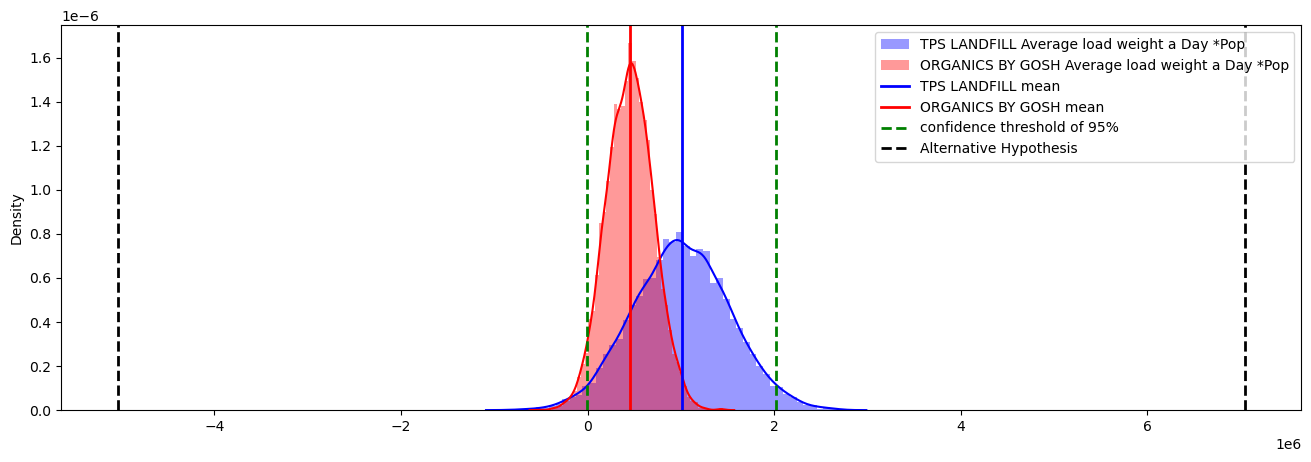

In [52]:
TPS_pop = np.random.normal(load_TDS_LANDFILL.load_weight.mean(),load_TDS_LANDFILL.load_weight.std(),10000)
Organics_pop = np.random.normal(load_ORGANICS_BY_GOSH.load_weight.mean(),load_ORGANICS_BY_GOSH.load_weight.std(),10000)

ci = stats.norm.interval(0.95, load_TDS_LANDFILL.load_weight.mean(), load_TDS_LANDFILL.load_weight.std())
plt.figure(figsize=(16,5))
sns.distplot(TPS_pop, label='TPS LANDFILL Average load weight a Day *Pop',color='blue')
sns.distplot(Organics_pop, label='ORGANICS BY GOSH Average load weight a Day *Pop',color='red')

plt.axvline(load_TDS_LANDFILL.load_weight.mean(), color='blue', linewidth=2, label='TPS LANDFILL mean')
plt.axvline(load_ORGANICS_BY_GOSH.load_weight.mean(), color='red',  linewidth=2, label='ORGANICS BY GOSH mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(TPS_pop.mean()+t_stat[0]*TPS_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(TPS_pop.mean()-t_stat[0]*TPS_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Based on research conducted by the two sample independent method, we can conclude that we reject the null hypothesis between TPS Landfill and Organics by Gosh have significant differences in terms of disposal and processing of waste during 2021.

# Math Probel

Forecasting to predict the future value of waste loads in the city of Austin by using the acceleration formula

In [53]:
# Prepare data to be used
daily_austinLW = austin_waste[['report_date','load_weight']].groupby('report_date').sum()
daily_austinLW

,load_weight
report_date,
2021-01-01,11300.0
2021-01-02,2181430.0
2021-01-04,2920260.0
2021-01-05,2399840.0
2021-01-06,2419150.0
...,...
2021-07-05,1897290.0
2021-07-06,1978140.0
2021-07-07,1620880.0


Use derivatives to find waste predictions

In [54]:
# Derivative of the V value tomorrow's waste prediction
v = np.diff(daily_austinLW['load_weight']/np.diff(range(167)))

In [55]:
# The acceleration formula to determine the rate of additional waste every day
Weight_Tomorrow = daily_austinLW["load_weight"][-1] + v[-1] * 1
abs(Weight_Tomorrow)

1255770.0

1. To calculate the first derivative, symbolic and numeric methods can be used, for this case, what techniques do you use?

        Calculate the derivative using the numerical method.

2. Do you need a mathematical function to calculate its derivatives?

        No, because there is a condition of the equation to the formula v and get the value of the derivative results.


3. How many load weight do you estimate on tomorrow?

        1255770.0 kg

## Conclusion, Assumptions, Overall Analysis

Based on the analysis that has been carried out, the need for new waste treatment and processing facilities due to waste disposal continues to increase. Based on the analysis of the average ratio of disposed and processed waste, there is no significant ratio of waste to disposed waste, in the sense that the waste disposal site can still accommodate the disposed waste.

The government is required to open a new site so that it can reveal a lot of processed waste in one place. The processing of waste delivery must also be evenly distributed in every place so that waste disposal can be processed properly. The capacity of the new site also needs to be considered so that it fits the needs and is in accordance with the analysis that has been carried out.

For the purposes of waste disposal analysis, calculation techniques are carried out using numerical methods. By using the v equation, obtained for the Derivative of the V value tomorrow's waste prediction.
Obtained predictions of waste that will be disposed of the next day in the city of Austin as much as 1255770.0 kg.